Dataset loaded successfully!


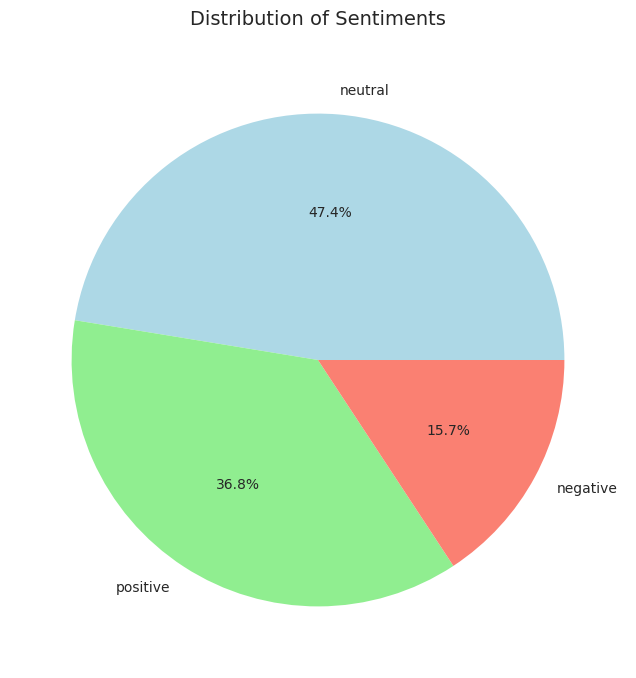


Sentiment Distribution:
Sentiment
neutral     237164
positive    184259
negative     78730
Name: count, dtype: int64


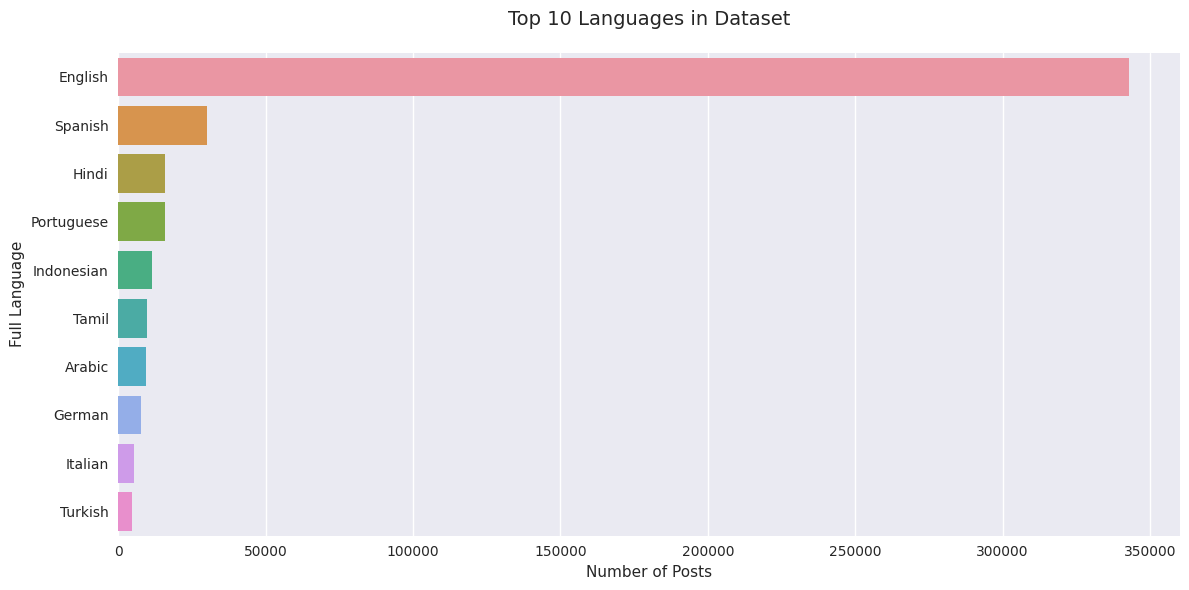


Top 10 Languages Distribution:
Full Language
English       343041
Spanish        30220
Hindi          15832
Portuguese     15779
Indonesian     11491
Tamil           9592
Arabic          9416
German          7822
Italian         5162
Turkish         4632
Name: count, dtype: int64


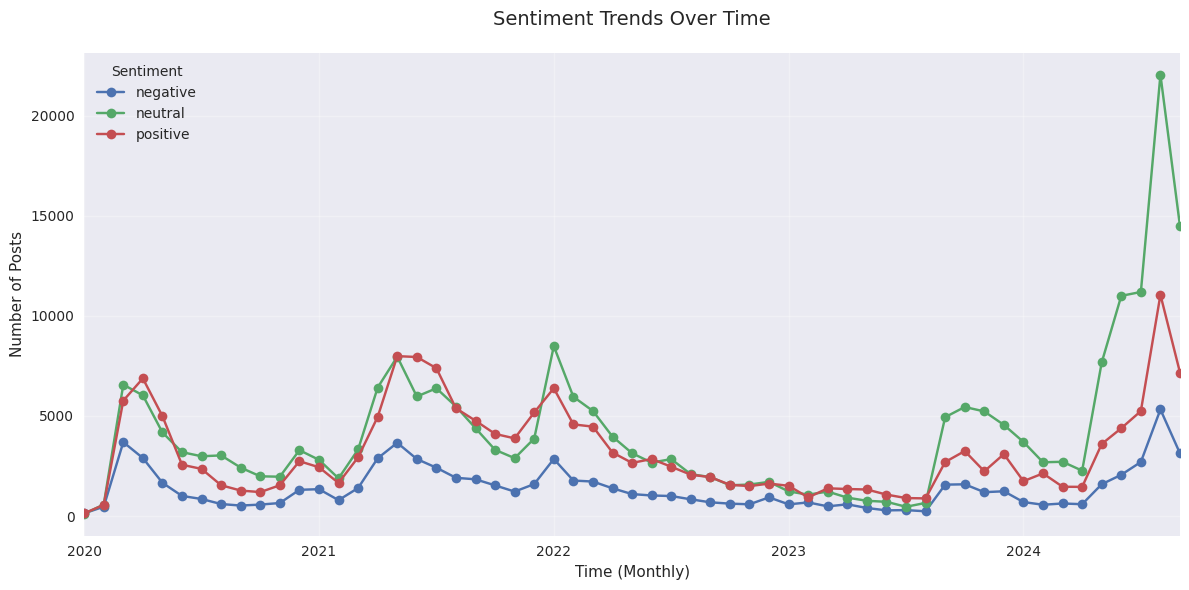


Sentiment Trends Over Time:
Sentiment  negative  neutral  positive
Date                                  
2024-05        1589     7676      3599
2024-06        2061    11003      4388
2024-07        2700    11195      5244
2024-08        5325    22051     11055
2024-09        3130    14481      7167


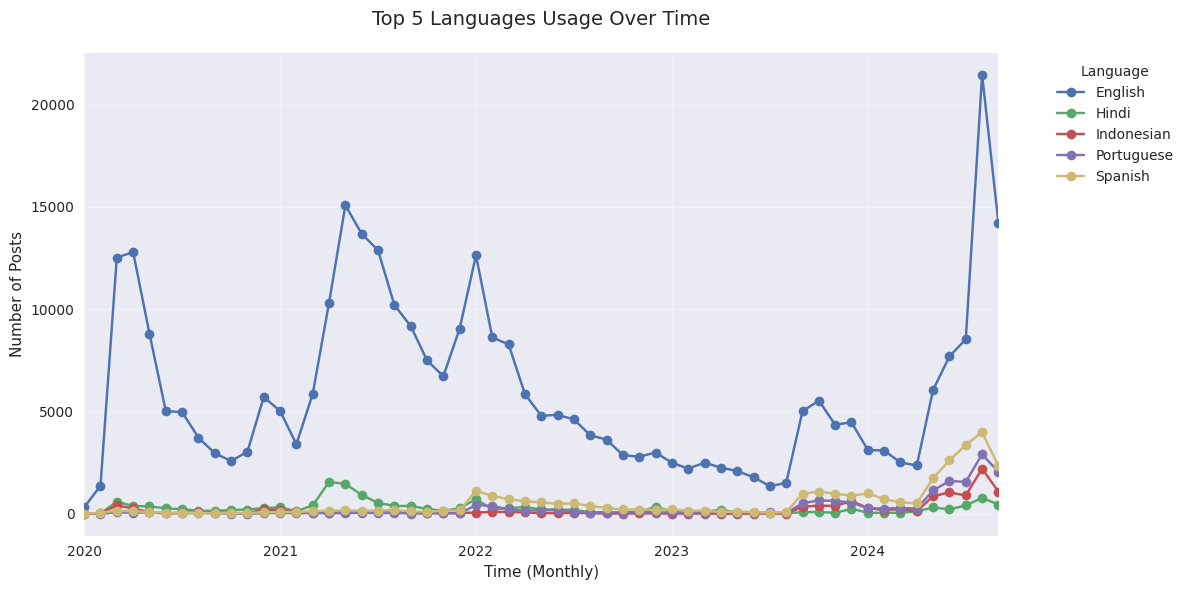


Language Distribution Over Time (Last 5 Months):
Full Language  English  Hindi  Indonesian  Portuguese  Spanish
Date                                                          
2024-05           6059    309         864        1145     1739
2024-06           7695    215        1042        1602     2616
2024-07           8529    412         897        1562     3363
2024-08          21459    778        2208        2906     3992
2024-09          14211    451        1075        2047     2332

Summary Statistics:
Total number of posts: 500,153
Number of unique languages: 161
Date range: 2020-01-21 to 2024-09-23


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualizations
plt.style.use('seaborn-v0_8')

# Kaggle-specific file path
dataset_path = "/kaggle/input/dataset/Dataset.xlsx"

# Load and prepare data
try:
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"The file at {dataset_path} does not exist.")
    df = pd.read_excel(dataset_path)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Ensure necessary columns exist
required_columns = ['Date', 'Sentiment', 'Full Language']
for col in required_columns:
    if col not in df.columns:
        print(f"Missing required column: {col}")
        exit()

# Convert 'Date' to datetime
try:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    if df['Date'].isnull().all():
        raise ValueError("All dates are invalid.")
except Exception as e:
    print(f"Error processing 'Date' column: {e}")
    exit()

# 1. Sentiment Distribution Pie Chart
try:
    plt.figure(figsize=(12, 8))
    sentiment_counts = df['Sentiment'].value_counts()
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', 
            colors=['lightblue', 'lightgreen', 'salmon'])
    plt.title('Distribution of Sentiments', pad=20, size=14)
    plt.show()

    print("\nSentiment Distribution:")
    print(sentiment_counts)
except Exception as e:
    print(f"Error plotting sentiment distribution: {e}")

# 2. Top 10 Languages Bar Chart
try:
    plt.figure(figsize=(12, 6))
    language_counts = df['Full Language'].value_counts().head(10)
    sns.barplot(x=language_counts.values, y=language_counts.index)
    plt.title('Top 10 Languages in Dataset', pad=20, size=14)
    plt.xlabel('Number of Posts')
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Languages Distribution:")
    print(language_counts)
except Exception as e:
    print(f"Error plotting top languages: {e}")

# 3. Sentiment Trends Over Time
try:
    sentiment_trends = df.groupby([df['Date'].dt.to_period('M'), 'Sentiment']).size().unstack()
    sentiment_trends.plot(kind='line', marker='o', figsize=(12, 6))
    plt.title('Sentiment Trends Over Time', pad=20, size=14)
    plt.xlabel('Time (Monthly)')
    plt.ylabel('Number of Posts')
    plt.legend(title='Sentiment')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\nSentiment Trends Over Time:")
    print(sentiment_trends.tail())
except Exception as e:
    print(f"Error plotting sentiment trends: {e}")

# 4. Language Distribution Over Time for Top 5 Languages
try:
    top_5_langs = df['Full Language'].value_counts().head(5).index
    lang_trends = df[df['Full Language'].isin(top_5_langs)].groupby(
        [df['Date'].dt.to_period('M'), 'Full Language']
    ).size().unstack()

    lang_trends.plot(kind='line', marker='o', figsize=(12, 6))
    plt.title('Top 5 Languages Usage Over Time', pad=20, size=14)
    plt.xlabel('Time (Monthly)')
    plt.ylabel('Number of Posts')
    plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\nLanguage Distribution Over Time (Last 5 Months):")
    print(lang_trends.tail())
except Exception as e:
    print(f"Error plotting language distribution: {e}")

# 5. Additional Statistics
try:
    print("\nSummary Statistics:")
    print(f"Total number of posts: {len(df):,}")
    print(f"Number of unique languages: {df['Full Language'].nunique():,}")
    print(f"Date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
except Exception as e:
    print(f"Error calculating statistics: {e}")